# Проект: Исследование стартапов

## Введение

**Знакомство с проектом**

Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.
Исследование на этом наборе датасетов уже пытались проводить внутренними силами, но собственных аналитиков у компании нет и для решения задачи пригласили аутсорс-специалистов. Данные неполны, поэтому заказчик, кроме ответа на некоторые интересующие его вопросы, просит аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.




**Цель проекта**

Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
Вам предстоит принять решения:
по каким столбцам можно объединять данные из разных таблиц;
можно ли доверять данным о сотрудниках стартапов и их образовании;
что значат покупки за 0 или за 1 доллар;
какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
как рассчитать и отобразить численные показатели и динамику.
Хорошо, если в процессе работы получится выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

**Описание данных**

Таблица `acquisition`

Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

Таблица `company_and_rounds`

Содержит информацию о компаниях и раундах финансирования:
company ID — идентификатор компании.
name — название компании.
- `ategory code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Таблица `education`

Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Таблица `people`

Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

Таблица `degrees`

Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузите все данные по проекту.


* Проверьте названия столбцов.


* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
# Установим библиотеку phik
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix


In [3]:
# создадим датасет acquisition_df
try:
    acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
except:
    print("Файл не найден")

In [4]:
# создадим датасет company_df
try:
    company_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
except:
    print("Файл не найден")

In [5]:
# создадим датасет degrees_df
try:
    degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
except:
    print("Файл не найден")

In [6]:
# создадим датасет education_df
try:
    education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
except:
    print("Файл не найден")

In [7]:
# создадим датасет people_df
try:
    people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
except:
    print("Файл не найден")

In [8]:
# создадим датасет fund_df
try:
    fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
except:
    print("Файл не найден")

In [9]:
# создадим датасет investment_df
try:
    investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
except:
    print("Файл не найден")

Данные выгружены, выведем необходимую информацию для каждого датасета:

In [10]:
# Выгрузим информацию о столбце acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [11]:
# Выгрузим первые 5 строк столбца acquisition_df
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Датасет `acquisition.csv` содержит **6** столбцов и **9407** строк и содержит информацию о покупках одними компаниями других компаний.

Название столбцов приведены к snake_case и не трубуют обработки. Пропуски есть в столбцах `term_code`, `acquired_at`.
Данные в столбцах `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` хранятся в типе данных `int64` - такой тип данных подходит для этих столбцов, так как данные вних являются уникальными ключами, дополнительно можно оптимизировать данные, а `price_amount` необходимо преобразовать в тип данных `float`, т.к. этот столбец хранит финансовые показатели о суммах сделок. Столбец `acquired_at` хранится в типе данных `object` и его необходимо преобразовать в тип данных для даты.

Пропуски в столбце `term_code` состовляют значительную часть данных.

In [12]:
# Выгрузим информацию о столбце company_df
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [13]:
# Выгрузим первые 5 строк столбца company_df
company_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
company_df.columns = company_df.columns.str.replace("  ", "_")

In [15]:
company_df.head(2)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0


Датасет `company_and_rounds.csv` содержит **22** столбца и **217,774** строк и содержит информацию о компаниях и раундах финансирования.

Названия столбцов необходимо привести к snake_case.

Столбцы `company  ID`, `investment  rounds`, `funding  rounds`, `funding  rounds`, `funding  total`, `milestones`, `funding  round  id`, `company  id`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round` - хранятся в типе `float64`, а остальные столбцы хранятся в типе данных `object`.

Столбцы `company  ID`, `milestones`, `company  id`, `participants`, `is  first  round`, `is  last  round` - необходимо привести к типу данных `int`, т.к. данные в этих столбцах в основном хранят числовые данные об индентификаторах компаний, кол-ва участников, и со значениями 0 и 1. Так с ними будет проще работать. Но нужно помнить, что из-за пропусков в некоторых столбцах, привести их к типу `int` не получится и необходимо сначала вставить заглушки или заполнить пропуски. Остальные данные в этом типе хранят финансовые показатели, поэтому их можно оставить без изменений.

Данные в столбцах `name`, `category code`, `status`, `domain`, `country code` и `funding round type` - хранятся в верных типах данных, но необходимо выгрузить уникальные значения в этих столбцах и провести нормализацию, чтобы в следующих шагах найти дублирующие строки и при необходимости придать верные названия для удобства.

А столбцы `founded at`, `funded at` необходимо будет привести к формату даты.

Пропуски есть в столбцах `company  ID`, `name`, `category  code`, `founded  at`, `closed  at`, `domain`, `network  username`, `country  code`, `funding  round  id`, `company  id`, `funded  at`, `funding  round  type`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round`. 

Пропуски в столбцах `funding  round  id`, `company  id`, `funded  at`, `funding  round  type`, `raised  amount`, `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round` распределены равномерно.


In [16]:
# Выгрузим информацию о столбце degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [17]:
# Выгрузим первые 5 строк столбца degrees_df
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Датасет `degrees.csv` содержит **4** столбца и **109,610** строк и содержит информацию о типе образования сотрудника.

Названия столбцов можно сотавить как есть, они уже приведены к snake_case.

Столбец `id` хранится в столбце `int64` и этот тип данных будет верны для этого столбца, при необходимости его можно оптимизировать, чтобы он занимал меньше места датасете. 

Столбцы `object_id`, `degree_type`, `subject` храняться в типе данных `object`. Но в столбце `object_id` необходимо избавиться от приставки `p:`.

В столбце `degree_type` необходимо выгрузить уникальные значения и проверить на наличие ошибок. 

Столбец `subject` необходимо нормализовать и вывести уникальные значения, чтобы проверить на наличие ошибок.



In [18]:
# Выгрузим информацию о столбце education_df
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [19]:
# Выгрузим первые 5 строк столбца education_df
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


Датасет `education.csv` содержит **4** столбца и **109,610** строк и содержит информацию об образовании сотрудника.

Названия столбцов можно сотавить как есть, они уже приведены к snake_case.

Столбцы `id`, `person_id` хранятся в столбце `int64` и этот тип данных будет верны для этого столбцов, при необходимости их можно оптимизировать.

Столбцы `instituition`, `graduated_at` храняться в типе данных `object`.

В столбце `instituition` необходимо выгрузить уникальные значения и проверить на наличие ошибок. 

Столбец `graduated_at` необходимо привести в формат даты.

In [20]:
# Выгрузим информацию о столбце people_df
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [21]:
# Выгрузим первые 5 строк столбца people_df
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Датасет `education.csv` содержит **5** столбцjd и **226,709** строк и содержит информацию о сотрудниках.

Названия столбцво уже приведены к snake_case и не требуют внимания.

Столбец `id` хранится в типе данных `int64` и подходится для анализа.

Столбцы `first_name`, `last_name` хранятся в типе данных `object` и являются верным.

Столбец `company_id` хранится в типе данных `float64` и его лучше приветси к типу данных `int`, но нужно помнить, что невозможно будет это сделать если есть пропуски, их сперва необходимо заполнить. 

Проверим дополнительные датасеты и выведем информацию о них: 

In [22]:
# Выведем информацию о датасете fund_df
fund_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [23]:
# Выведем первые 5 строк датасета fund_df
fund_df.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


Датасет хранит информацию о фондах. Пропуски есть в столбцах name, founded_at, domain, network_username, country_code. Все остальные столбцы полные.

In [24]:
# Выведем информацию о датасете investment_d
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [25]:
# Выведем первые 5 строк investment_d
investment_df.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


Датасет полный и хранит информацию о раундах инвестирования.

В данных могу быть ошибки, неявные дубликаты и полные дубликаты. Чтобы проверить данные, необходимо нормализовать столбцы и проверить на начиличе дубликатов. Сделаем это для всех данных, которые у нас есть, для дальнейшего анализа будем считать данные подготовленными. Проведем нормализацию по всем данным и проверим кол-во дубликатов в выгруженныех датасетах для данных:

In [26]:
# проведем нормализацию для датасета acquisition_df
acquisition_df['term_code'] = acquisition_df['term_code'].str.lower()
# проверим, что уникальные значения для этого столбца после нормализации находятся в правильных категориях
acquisition_df['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

In [27]:
# проведем нормализацию для датасета company_df
company_df['name'] = company_df['name'].str.lower()
company_df['status'] = company_df['status'].str.lower()
company_df['domain'] = company_df['domain'].str.lower()
company_df['network_username'] = company_df['network_username'].str.lower()
company_df['category_code'] = company_df['category_code'].str.upper()
company_df['country_code'] = company_df['country_code'].str.upper()
company_df['funding_round_type'] = company_df['funding_round_type'].str.upper()

# проверим данные по категориям, что значения в этих столбцах после нормализации действительно уникальны: 
company_df['status'].unique()
company_df['domain'].unique()
company_df['category_code'].unique()
company_df['country_code'].unique()
company_df['funding_round_type'].unique()

array(['SERIES-A', 'SERIES-B', 'SERIES-C+', nan, 'ANGEL', 'VENTURE',
       'OTHER', 'PRIVATE-EQUITY', 'POST-IPO', 'CROWDFUNDING'],
      dtype=object)

In [28]:
company_df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

In [29]:
company_df['category_code'].unique()

array(['WEB', 'GAMES_VIDEO', 'NETWORK_HOSTING', 'ADVERTISING',
       'CLEANTECH', nan, 'ENTERPRISE', 'OTHER', 'CONSULTING', 'MOBILE',
       'HEALTH', 'SOFTWARE', 'ANALYTICS', 'FINANCE', 'EDUCATION',
       'MEDICAL', 'MANUFACTURING', 'BIOTECH', 'ECOMMERCE',
       'PUBLIC_RELATIONS', 'HARDWARE', 'SEARCH', 'NEWS', 'GOVERNMENT',
       'SECURITY', 'PHOTO_VIDEO', 'TRAVEL', 'SEMICONDUCTOR', 'SOCIAL',
       'LEGAL', 'TRANSPORTATION', 'HOSPITALITY', 'SPORTS', 'NONPROFIT',
       'FASHION', 'MESSAGING', 'MUSIC', 'AUTOMOTIVE', 'DESIGN',
       'REAL_ESTATE', 'LOCAL', 'NANOTECH', 'PETS'], dtype=object)

In [30]:
company_df['country_code'].unique()

array(['USA', nan, 'MAR', 'IND', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'CAN', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN',
       'RUS', 'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK',
       'ARG', 'PAK', 'HUN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD',
       'CHE', 'SVN', 'UKR', 'ITA', 'NZL', 'LIE', 'NOR', 'CZE', 'VNM',
       'HRV', 'BEN', 'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK',
       'TWN', 'CRI', 'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'AZE', 'COL',
       'PHL', 'ARE', 'IDN', 'ROM', 'ANT', 'CYM', 'NGA', 'GIN', 'CYP',
       'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN', 'BGR', 'PER', 'LVA',
       'LAO', 'NPL', 'MDA', 'CMR', 'UGA', 'TUN', 'URY', 'MUS', 'VEN',
       'OMN', 'ECU', 'KWT', 'JOR', 'LTU', 'ALB', 'QAT', 'UMI', 'PST',
       'REU', 'GTM', 'PCN', 'BHS', 'GEO', 'BWA', 'DZA', 'GRD', 'ZMB',
       'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA', 'BHR', 'SYC', 'SLE',
       'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV', 'AFG', 'BLZ', 'UZB',
       'IRN', '

In [31]:
company_df['funding_round_type'].unique()

array(['SERIES-A', 'SERIES-B', 'SERIES-C+', nan, 'ANGEL', 'VENTURE',
       'OTHER', 'PRIVATE-EQUITY', 'POST-IPO', 'CROWDFUNDING'],
      dtype=object)

Да, все значения действительно уникальные, продолжим нормализацию данных

In [32]:
# нормализуем столбцы в датасете degrees_df
degrees_df['subject'] = degrees_df['subject'].str.lower()
degrees_df['degree_type'] = degrees_df['degree_type'].str.upper()

In [33]:
# нормализуем столбцы в датасете education_df
education_df['instituition'] = education_df['instituition'].str.lower()


In [34]:
# нормализуем столбцы в датасете people_df
people_df['first_name'] = people_df['first_name'].str.lower()
people_df['last_name'] = people_df['last_name'].str.lower()

In [35]:
# нормализуем столбцы в датасете fund_df
fund_df['name'] = fund_df['name'].str.lower()
fund_df['domain'] = fund_df['domain'].str.lower()
fund_df['network_username'] = fund_df['network_username'].str.lower()
fund_df['country_code'] = fund_df['country_code'].str.upper()

В датасете `investment_df` проводить нормализацию нет смылса, данные в этом датасете содержат уникальные ключи из других таблиц.

In [36]:
acquisition_duplicate = acquisition_df.sort_values(by='id', ascending=False).duplicated().sum()
copmany_duplicate = company_df.duplicated().sort_values(ascending=False).sum()
degrees_duplicate = degrees_df.duplicated().sort_values(ascending=False).sum()
education_duplicate = education_df.duplicated().sort_values(ascending=False).sum()
people_duplicate = people_df.duplicated().sort_values(ascending=False).sum()
fund_duplicate = fund_df.duplicated().sort_values(ascending=False).sum()
investment_duplicate = investment_df.sort_values(by='id', ascending=False).duplicated().sum()

print(f'Кол-во дубликатов в датасете acquisition_df:{acquisition_duplicate}')
print(f'Кол-во дубликатов в датасете company_df:{copmany_duplicate}')
print(f'Кол-во дубликатов в датасете degrees_df:{degrees_duplicate}')
print(f'Кол-во дубликатов в датасете education_df:{education_duplicate}')
print(f'Кол-во дубликатов в датасете people_df:{people_duplicate}')
print(f'Кол-во дубликатов в датасете fund_df:{fund_duplicate}')
print(f'Кол-во дубликатов в датасете investment_df:{investment_duplicate}')

Кол-во дубликатов в датасете acquisition_df:0
Кол-во дубликатов в датасете company_df:0
Кол-во дубликатов в датасете degrees_df:0
Кол-во дубликатов в датасете education_df:0
Кол-во дубликатов в датасете people_df:0
Кол-во дубликатов в датасете fund_df:0
Кол-во дубликатов в датасете investment_df:0


Была проведена нормализация по всем датасетам, после чего посчитаны полные дубликаты по всем датасетам. Дубликаты не были обнаружены.

**Промежуточный вывод:**

Датасеты были созданны в новых переменных, о каждом датасете была выведена полная информация и первые строки, что помогла визуально оценить и подметить выводы для дальнейшей работы с данными. Также была проведена нормализация всех данных, т.е. столбцы были приведены к нижнему или верхнему регистру. После проверены на полные дубликаты. 
В итоге полных дубликатов ни в одном датасете обнаружено не было.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [37]:
# Приведем столбец 'acquired_at' в датасете acquisition_df к типу данных 'datetime64'
for column in ['acquired_at']:
    acquisition_df[column] = pd.to_datetime(acquisition_df[column]) 

In [38]:
# проверим измененный тип данных 
acquisition_df.dtypes

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [39]:
# Приведем столбецы 'founded_at', 'funded_at', 'closed  at' в датасете company_df к типу данных 'datetime64'
for column in ['founded_at', 'funded_at', 'closed_at']:
    company_df[column] = pd.to_datetime(company_df[column]) 

In [40]:
# проверим измененный тип данных 
company_df.dtypes

company_ID                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id                    float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [41]:
# Приведем столбец graduated_at' в датасете education_df к типу данных 'datetime64'
for column in ['graduated_at']:
    education_df[column] = pd.to_datetime(education_df[column]) 

In [42]:
# проверим измененный тип данных 
education_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

Типы данных приведены где необходиму к типу даты. Дальше займемся оценкой полноты данных и сделаем выводы о пропусках. 

In [43]:
# проверим процент пропусков в каждом столбце датасета acquisition_df
acquisition_df.isna().mean() * 100

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

В столбце `term_code` доля пропусков соствляет 80% - это очень много, т.к. в этом столбце хранятся данные о вариантах рассчета. 

In [44]:
# проверим процент пропусков в каждом столбце датасета company_df
company_df.isna().mean() * 100 

company_ID              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

В датасете `company_and_rounds.csv` пропуски есть в каждом столбце, возможно из-за пропусков в столбце `company  ID` - если удалить эти данные они не повлияют на качество датасета. 

Пропуски в столбце `category code` - содержат информацию о категории деятельности компании пропуски в даном столбце составляют 34% для дальнейшего анализа они не слишком нам нужны. Можно их оставить как есть.
Пропуски в столбцах `founded at` и `closed at` - состовляют огромную часть данных. Возможно их стоит заполнить.
В данных о финасировании, которые нужны для анализа, так же содержится большое кол-во пропусков, возможно они представляют не большую ценность для того чтобы сделать какие-то выводы. 

In [45]:
degrees_df.isna().mean() * 100

id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

Датасет degrees_df, хранит данные о типе образования и содержит малое кол-во пропусков. Датасет можно назвать полным, он подходит для анализа.

In [46]:
education_df.isna().mean() * 100 

id               0.000000
person_id        0.000000
instituition     0.050178
graduated_at    47.035854
dtype: float64

Датасет education_df имеет малую долю пропусков в столбце `institution`, который хранит информацию об учебных заведениях, но в столбце `graduated_at` содержится половина пропущеных значений - данные в этом столбце хранят дату получения образования и в принципе не слишком нужны для анализа.

In [47]:
people_df.isna().mean() * 100

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

В датасете `people_df` столбец `company_id` содержит 84% пропусков . Этот столбец хранит данные о компаниях в которых работают сотрудники. К сожалению, эти данные неполные и их будет трудно соединить с другими таблицами, данные в таких таблицах буду неполные.

**Промежуточный вывод:**

В ходе анализа пропусков в датасетах, было выявлено, что не все данные качественные, некоторые столбцы хранят много пропущенных значений. Так в датасете о компаниях и раундах финансирования, в информации о финансировании хранится значительно кол-во пропущенных значений. А датасеты об образовании и сотрудниках хранят достаточно много информации, но, к сожалению, имеют большое кол-во пропусков в данных о компаниях и соединить такие датасеты вместе будет проблематично.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [48]:
# добавим в датасет company_df новый столбец с годом финансирования 
company_df['year_of_funded'] = company_df['funded_at'].dt.to_period('Y')

In [49]:
# сгруппируем данные для сводной таблицы по году финансирования, агрегируем столбец суммы финансирования, чтобы найти типичные цену 
# раунда финансирования и столбец раундов финансирования, чтобы найти число раундов в году
pivot_amount = company_df.groupby('year_of_funded').agg({'raised_amount': 'median',
                                    'funding_rounds': 'count'})

# отфильтруем таблицу, где в году больше 50 раундов финансирования
filtred_pivot = pivot_amount.loc[pivot_amount['funding_rounds'] > 50]

#выведем таблицу
display(filtred_pivot)

,raised_amount,funding_rounds
year_of_funded,,
1999,2000000.0,76
2000,4200000.0,125
2001,3000000.0,95
2002,4200000.0,115
2003,3000000.0,154
2004,5000000.0,286
2005,5500000.0,1624
2006,5000000.0,2409
2007,3973320.0,3220


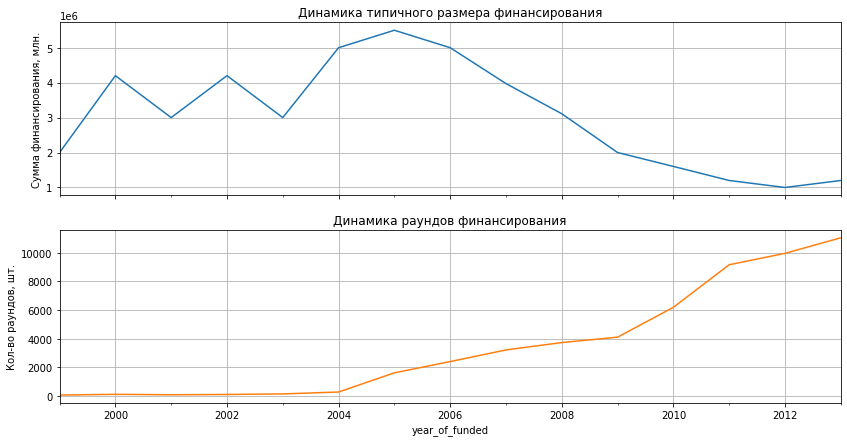

In [50]:
line_pivot = filtred_pivot.plot(kind='line',
            subplots=True,
            sharex=True,
            sharey=False,
            legend=False,
            title=['Динамика типичного размера финансирования', 'Динамика раундов финансирования'],
            figsize=(14, 7),
            grid=True
)

# Подписываем оси
line_pivot[0].set_ylabel('Сумма финансирования, млн.')
line_pivot[1].set_ylabel('Кол-во раундов, шт.')

plt.show()

**Промежуточный вывод:**

На основании визуализации можно сделать вывод, что в 2005 году типичный размер финансирования для 1-го раунда был наибольше всего, но начиная с этого года тенденция к повышению размера финансирования падала, в то время как тенденция на кол-во раундов винансирования росла. 
Что каксается 2013 года, отмечается небольшой рост типичного размера финансирования. Динамика раундов финансирования в этом году достигла пика.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [51]:
# Подготовим объединенный датасет 
merged_df = people_df.merge(education_df, left_on='id', right_on='person_id', how='left').sort_values(by='company_id')

In [52]:
# выведем первые 5 строк
merged_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
191140,3,kevin,flaherty,1.0,NaN,707.0,3.0,indiana university,NaT
191139,3,kevin,flaherty,1.0,NaN,706.0,3.0,washington university in st louis,NaT
4393,104800,alex,weinstein,1.0,alexweinstein,NaN,NaN,NaN,NaT
265175,9729,bharath,balasubramanian,2.0,spinfree,594.0,9729.0,tamilnadu college of engineering,1998-01-01
230712,6456,sridhar,vembu,3.0,NaN,43581.0,6456.0,"indian institute of technology, madras",1989-01-01


In [53]:
# выведем общую информацию об объедененном датасете
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 191140 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [54]:
#проверим качество объединенных данных 
merged_df.isna().mean() * 100

id_x                 0.000000
first_name           0.001868
last_name            0.000374
company_id          83.268583
network_username    81.032447
id_y                59.260947
person_id           59.260947
instituition        59.281119
graduated_at        78.448901
dtype: float64

Присоединим датасет degrees_df к объединенному датасету, чтобы получить более полные данные и сравним его с датасетом только по education_df.

In [55]:
# перезапишем датасет и объеденим по индетефикатору запись 
merged_df = merged_df.merge(degrees_df, how='left', left_on='id_y', right_on='id')

In [56]:
merged_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject
0,3,kevin,flaherty,1.0,NaN,707.0,3.0,indiana university,NaT,707.0,p:3,MBA,NaN
1,3,kevin,flaherty,1.0,NaN,706.0,3.0,washington university in st louis,NaT,706.0,p:3,BBA,NaN
2,104800,alex,weinstein,1.0,alexweinstein,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,9729,bharath,balasubramanian,2.0,spinfree,594.0,9729.0,tamilnadu college of engineering,1998-01-01,594.0,p:9729,BS,computer science engineering
4,6456,sridhar,vembu,3.0,NaN,43581.0,6456.0,"indian institute of technology, madras",1989-01-01,43581.0,p:6456,BS,NaN


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
 9   id                109056 non-null  float64       
 10  object_id         109056 non-null  object        
 11  degree_type       97886 non-null   object        
 12  subject           80890 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memor

Можно сделать вывод, что наибольшее кол-во пропусков содержится в столбце с информацией о компаниях, имени в интернете и дате окончании учебного заведения, остальные пропуски распределены равномерно.

In [58]:
# создадим новый столбец, в котором отразим общее кол-во раундов финансирования, он нам понадобится чтобы сделать категории
merged_df['company_people_count'] = merged_df.groupby('company_id')['id_x'].transform('count')

In [59]:
# проверим полученный датасет, всё корректно
merged_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject,company_people_count
0,3,kevin,flaherty,1.0,NaN,707.0,3.0,indiana university,NaT,707.0,p:3,MBA,NaN,3.0
1,3,kevin,flaherty,1.0,NaN,706.0,3.0,washington university in st louis,NaT,706.0,p:3,BBA,NaN,3.0
2,104800,alex,weinstein,1.0,alexweinstein,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3.0
3,9729,bharath,balasubramanian,2.0,spinfree,594.0,9729.0,tamilnadu college of engineering,1998-01-01,594.0,p:9729,BS,computer science engineering,1.0
4,6456,sridhar,vembu,3.0,NaN,43581.0,6456.0,"indian institute of technology, madras",1989-01-01,43581.0,p:6456,BS,NaN,5.0


In [60]:
# создадим функцию, которая будет разбивать столбец company_people_count на категории предприятий в зависимости от кол-во сотрудников
def categorize_company(people):
    if people < 2:
        return "Микростартап"
    elif people < 10:
        return "Малые стартапы"
    elif people < 50:
        return "Средние стартапы"
    elif people < 100:
        return "Крупные стартапы"
    elif people < 250:
        return "Масштабные стартапы"
    
merged_df['company_group'] = merged_df['company_people_count'].apply(categorize_company)

В коде выше разделили объединенный датасет на категории стартапов.

Проверим распределение кол-ва человек, для этого построим график распределения:

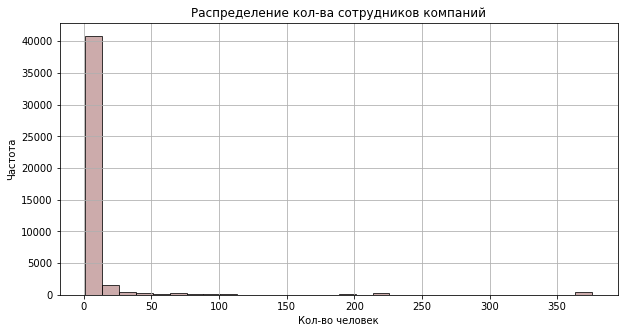

In [61]:
# Строим гистограмму распределения посадочных мест
merged_df['company_people_count'].sort_values(ascending=False).plot(
                kind='hist',
                bins=30,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='#BC8F8F'
)

# Настраиваем оформление графика
plt.title('Распределение кол-ва сотрудников компаний')
plt.xlabel('Кол-во человек')
plt.ylabel('Частота')

# Выводим график
plt.show()

In [62]:
merged_df = merged_df.loc[merged_df['company_people_count'] > 0]

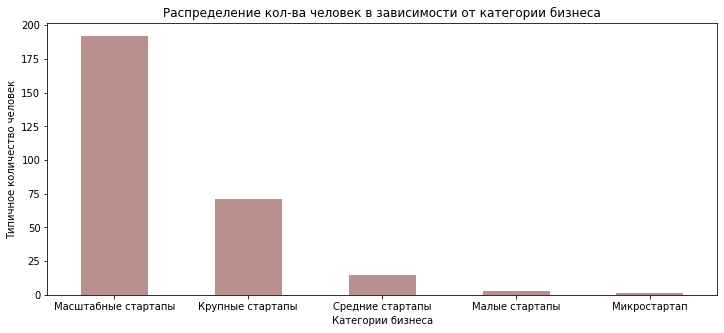

In [63]:
merged_df.groupby('company_group')['company_people_count'].median().sort_values(ascending=False).plot(
               kind='bar',
               rot=0,
               legend=False,
               title=f'Распределение кол-ва человек в зависимости от категории бизнеса',
               figsize=(12, 5),
               grid=False,
               color='#BC8F8F'
)
# Настраиваем оформление графика
plt.xlabel('Категории бизнеса')
plt.ylabel('Типичное количество человек')
# Выводим график
plt.show()

In [64]:
# Создадим новый столбец is_education
merged_df['is_education'] = merged_df['instituition'].isna() 

In [65]:
# Создадим новый столбец is_degree_type
merged_df['is_degree_type'] = merged_df['degree_type'].isna() 

In [66]:
# Создадим новый столбец is_subject
merged_df['is_subject'] = merged_df['subject'].isna() 

In [67]:
merged_df.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id,object_id,degree_type,subject,company_people_count,company_group,is_education,is_degree_type,is_subject
0,3,kevin,flaherty,1.0,NaN,707.0,3.0,indiana university,NaT,707.0,p:3,MBA,NaN,3.0,Малые стартапы,False,False,True
1,3,kevin,flaherty,1.0,NaN,706.0,3.0,washington university in st louis,NaT,706.0,p:3,BBA,NaN,3.0,Малые стартапы,False,False,True
2,104800,alex,weinstein,1.0,alexweinstein,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,3.0,Малые стартапы,True,True,True
3,9729,bharath,balasubramanian,2.0,spinfree,594.0,9729.0,tamilnadu college of engineering,1998-01-01,594.0,p:9729,BS,computer science engineering,1.0,Микростартап,False,False,False
4,6456,sridhar,vembu,3.0,NaN,43581.0,6456.0,"indian institute of technology, madras",1989-01-01,43581.0,p:6456,BS,NaN,5.0,Малые стартапы,False,False,True


Всё отлично, новые столбецы создались корректно, продолжим. Теперь нужно создать столбец на основании столбца `institution`, который хранит информацию об учебном завидении. Я считаю, если есть информация в этом столбце, значит у сотрудника есть информация об образовании.

In [68]:
merged_df['is_full_education'] = (merged_df['is_education'] == True) | (merged_df['is_degree_type'] == True) | (merged_df['is_subject'] == True)
                                 

In [69]:
# Посчитаем долю пропусков в каждой группе и выведем информацию 
education_percent = merged_df.groupby('company_group')['is_full_education'].mean() * 100

display(education_percent)

company_group
Крупные стартапы       47.033898
Малые стартапы         43.567568
Масштабные стартапы    36.641221
Микростартап           67.667845
Средние стартапы       47.657791
Name: is_full_education, dtype: float64

Пропуски об образовани распределены в кажно категории почти равномерно, больше всего выделяется категория микропредприятия, где работает малое кол-во человек, возможно там изначально нет информации об образовании сотрудников. 
Пропуски идут на снижение, чем крупнее предприятие, тем меньше пропусков в данных.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец network_username есть в подготовленных датасетах : company_df, people_df. Выведем и посчитаем уникальные значения по столбцу для каждого датасета:

In [70]:

# создадим новую переменную в которой выведем уникальные значения датасета company_df по столбцу network  username посредством множества
unique_company_network = set(company_df['network_username'])
# создадим новую переменную в которой выведем уникальные значения датасета people_df по столбцу network_username посредством множества
unique_people_network = set(people_df['network_username'])
# создадим новую переменную в которой выведем уникальные значения датасета fund_df по столбцу network_username посредством множества
unique_fund_network = set(fund_df['network_username'])


# создадим новую переменную в которой посчитаем уникальные значения датасета company_df по столбцу network  username
count_unique_company_network = company_df['network_username'].nunique()
# создадим новую переменную в которой посчитаем уникальные значения датасета people_df по столбцу network_username
count_unique_people_network = people_df['network_username'].nunique()
# создадим новую переменную в которой посчитаем уникальные значения датасета fund_df по столбцу network_username
count_unique_fund_network = fund_df['network_username'].nunique()


# Посчитаем общее кол-во уникальных значений в 2-х датасетах 
count_sets = count_unique_company_network + count_unique_people_network + count_unique_fund_network

# найдем дубликаты в обоих датасетах, для этого используем метод intersection()

intersection_df = unique_company_network.intersection(unique_people_network).intersection(unique_fund_network)

count_intersections = len(intersection_df)

# Посчитаем долю общих пересеченый для двух датасетов

intersection_percent = round(count_intersections/count_sets * 100, 2)

print(f'Выведем кол-во уникальных значений для столбца netwrok  username датасета company_df:\n{count_unique_company_network}')
print(f'Выведем кол-во уникальных значений для столбца netwrok_username датасета people_df:\n{count_unique_people_network}')
print(f'Выведем кол-во уникальных значений для столбца netwrok_username датасета fund_df:\n{count_unique_fund_network}')
print(f'Посчитаем общее кол-во уникальных значений в 3 датасетах:\n{count_sets}')
print(f'Выведем кол-во дубликатов в обоих столбцах по столбцу network_username:\n{count_intersections}')
print(f'Выведем процент пересечений:\n{intersection_percent}%')


Выведем кол-во уникальных значений для столбца netwrok  username датасета company_df:
79374
Выведем кол-во уникальных значений для столбца netwrok_username датасета people_df:
38421
Выведем кол-во уникальных значений для столбца netwrok_username датасета fund_df:
2091
Посчитаем общее кол-во уникальных значений в 3 датасетах:
119886
Выведем кол-во дубликатов в обоих столбцах по столбцу network_username:
9
Выведем процент пересечений:
0.01%


Всего было посчитано 119849 уникальных значений после нормализации из 3 датасетов. Всего 0.01% оказалось значениями, которые есть в трех датасетах в этих столбцах. Можно сделать вывод, что объединить датасеты по этому столбцу невозможно, т.к. очень мало данных пересекаются. Полученый датасет будет плохого качества. 



### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [71]:
# Выведем таблицу и посмотрим откуда начинаются границы пропусков
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [72]:
# создадим новый датасет, в котором выберем только необходимые столбцы
rounds_funding = company_df[['company_ID', 
                             'name',
                             'category_code',
                             'status',
                             'founded_at',
                             'closed_at',
                             'domain',
                             'network_username',
                             'country_code',
                             'investment_rounds',
                             'funding_rounds',
                             'funding_total',
                             'milestones']]

In [73]:
# отсортируем данные по столбцу company_id
rounds_funding = rounds_funding.sort_values(by='company_ID', ascending=True)

In [74]:
# выведем информацию о датасете 
rounds_funding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [75]:
# проверим, чт преобразования выполнены корректно
rounds_funding.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
63280,2.0,adventnet,ENTERPRISE,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.0,0.0
153920,3.0,zoho,SOFTWARE,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.0,5.0


In [76]:
# посчитаем процент пропусков в данные 
rounds_funding.isna().mean() * 100

company_ID            0.138676
name                  0.138676
category_code        33.928752
status                0.138676
founded_at           49.509124
closed_at            98.416248
domain               32.425818
network_username     56.131586
country_code         50.128574
investment_rounds     0.138676
funding_rounds        0.138676
funding_total         0.138676
milestones            0.138676
dtype: float64

In [77]:
# удалим пропуски в столбце company_id, чтобы получить полные данные 
rounds_funding = rounds_funding.dropna(subset=['company_ID'])

In [78]:
# проверим, что пропуски удалены
rounds_funding.isna().mean() * 100

company_ID            0.000000
name                  0.000000
category_code        33.837000
status                0.000000
founded_at           49.439008
closed_at            98.414049
domain               32.331978
network_username     56.070667
country_code         50.059318
investment_rounds     0.000000
funding_rounds        0.000000
funding_total         0.000000
milestones            0.000000
dtype: float64

In [79]:
# далее найдем полные дубликаты в данных 
rounds_funding_duplicates = rounds_funding.duplicated().sum()
rounds_funding_duplicates

20919

In [80]:
#
rounds_funding.drop_duplicates()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,3.975000e+07,5.0
63280,2.0,adventnet,ENTERPRISE,operating,1996-01-01,NaT,adventnet.com,manageengine,USA,0.0,0.0,0.000000e+00,0.0
153920,3.0,zoho,SOFTWARE,operating,2005-09-15,NaT,zoho.com,zoho,USA,0.0,0.0,0.000000e+00,5.0
165415,4.0,digg,NEWS,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0
217293,5.0,socialnet,SOCIAL,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152350,286210.0,lg electronics north america,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,1.0
152351,286211.0,m1 capital advisors llc,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,0.0
152352,286212.0,m1 partners,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,0.0
152353,286213.0,computer solutions,NaN,operating,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.000000e+00,0.0


In [81]:
# запишем датасет в новую переменную для дальнейшего анализа 
company_actual = rounds_funding

Подведем итоги: в ходе подготовки датасета, были оставлены данные только о финансировании и компания, датасет отсортирован по id компании и отражает этапы финансирования. Названия столбцов приведены к snake_case. Удалены полные дубликаты. Остальные данные оставлены, чтобы сохранить максимально полный датасет, но были удалены пропуски по всем данным, по company_id, т.к. эти данные не смогли бы использовать.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [82]:
# создадим актуальный датасет, где funding_rounds или investment_rounds больше нуля
df_actual = company_actual[(company_actual['funding_rounds'] > 0) | 
                           (company_actual['investment_rounds'] > 0) | 
                           (company_actual['status'] == 'acquired')]


In [83]:
# проверим новый датасет:
df_actual.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,wetpaint,WEB,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,USA,0.0,3.0,39750000.0,5.0
165415,4.0,digg,NEWS,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0
165414,4.0,digg,NEWS,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,45000000.0,8.0


In [84]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61666 entries, 0 to 152354
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         61666 non-null  float64       
 1   name               61666 non-null  object        
 2   category_code      56015 non-null  object        
 3   status             61666 non-null  object        
 4   founded_at         46536 non-null  datetime64[ns]
 5   closed_at          2957 non-null   datetime64[ns]
 6   domain             56368 non-null  object        
 7   network_username   35793 non-null  object        
 8   country_code       55359 non-null  object        
 9   investment_rounds  61666 non-null  float64       
 10  funding_rounds     61666 non-null  float64       
 11  funding_total      61666 non-null  float64       
 12  milestones         61666 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 6.

Датасет приведен к формату который нужен заказчику, можно продолжить анализ.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [85]:
# выведем статистические показатели для столбца funding total
funding_descr = df_actual['funding_total'].describe()

In [86]:
funding_descr

count    6.166600e+04
mean     2.114623e+07
std      9.013045e+07
min      0.000000e+00
25%      6.000000e+04
50%      2.490000e+06
75%      1.594880e+07
max      5.700000e+09
Name: funding_total, dtype: float64

Средняя сумма равна ~ 2,1 мл., а медианное значение равно ~ 2,5, что незначительно отличается от среднего. Это говорит о том, что в данных распределение близко к нормальному. Но стандарное отклонение в 9 мл. говорит о том, что данные имеют большой разброс минимальных и максимальных значений от среднего.

Для оценки типичный суммы финансирования для одной компании построем гистограмму:


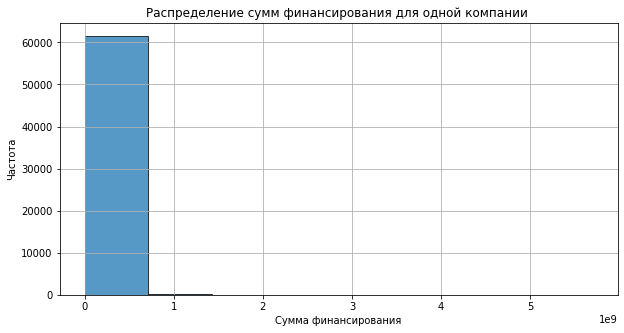

In [87]:
# Строим гистограмму распределения посадочных мест
df_actual['funding_total'].sort_values(ascending=False).plot(
                kind='hist',
                bins=8,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True
)

# Настраиваем оформление графика
plt.title('Распределение сумм финансирования для одной компании ')
plt.xlabel('Сумма финансирования')
plt.ylabel('Частота')

# Выводим график
plt.show()

Видно, что гистограмма имеет смещение в левую сторону и хвост в правой, что говорит об аномально низких значениях для эти данных. Посмотрим на гистограмму "сверху" - для этого построим диаграмму размаха.

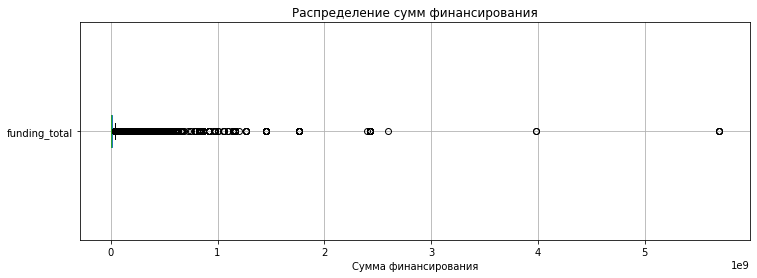

In [88]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений в столбце balance
df_actual.boxplot(column='funding_total', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение сумм финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show()

Нормальными для этих данных судя по диаграмме размаха, будут положительные значения около нуля, остальная часть данных судя по диаграмме - это выбросы. 


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

Для того чтобы исследовать компании, которые были проданы за 0 или 1 доллар, нужно отфильтровать данные: 

In [89]:
new_acquisition_df = acquisition_df.merge(company_df, left_on='acquired_company_id', right_on='company_ID', how='left')

In [90]:
new_acquisition_df = new_acquisition_df[(new_acquisition_df['price_amount'] == 0) | (new_acquisition_df['price_amount'] == 1)]

In [91]:
new_acquisition_df = new_acquisition_df[(new_acquisition_df['funding_total'] != 0)]

In [92]:
# выведем отфильтрованный датасет
new_acquisition_df.head(7)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_ID,name,category_code,status,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year_of_funded
8,14,318,314,cash,0,2006-10-01,314.0,reddit,WEB,acquired,...,266.0,314.0,2005-06-01,ANGEL,100000.0,0.0,1.0,1.0,1.0,2005
56,65,146,698,cash,0,2007-08-01,698.0,maya's mom,WEB,acquired,...,544.0,698.0,2006-10-27,ANGEL,1000000.0,0.0,7.0,1.0,1.0,2006
58,67,156,718,cash,0,2007-08-01,718.0,glimpse,ECOMMERCE,acquired,...,564.0,718.0,2006-01-01,SERIES-A,4000000.0,0.0,2.0,1.0,1.0,2006
76,87,1035,175,cash,0,2007-10-01,175.0,newsvine,WEB,acquired,...,160.0,175.0,2005-07-01,SERIES-A,1250000.0,0.0,1.0,1.0,1.0,2005
100,115,396,1582,cash,0,2007-12-01,1582.0,beliefnet,WEB,acquired,...,1270.0,1582.0,2005-06-01,SERIES-A,7000000.0,0.0,1.0,1.0,1.0,2005
124,132,59,49,NaN,0,2006-10-31,49.0,jotspot,WEB,acquired,...,427.0,49.0,2004-08-01,SERIES-A,5200000.0,0.0,2.0,1.0,1.0,2004
166,179,2618,2619,cash,0,2007-05-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


Из данных можно сделать вывод, что за 0 в основном покупали закрытые компании, с маленьким объемом финасирования. В основном, это web компани. 
Стоит отметить, что в подобных случаях цена продажи за ноль или символическую сумму часто объясняется тем, что покупатель берет на себя обязательства по погашению долгов компании или иным обязательствам, что значительно уменьшает стоимость самой компании. 
Так же возможо, что такие покупки обусловлены сбоем в данных, т.к. покупались они за наличные и могу отсуствовать данные.

In [93]:
# Вычисляем квартили Q1 и Q3
Q1 = df_actual['funding_total'].quantile(0.25)
Q3 = df_actual['funding_total'].quantile(0.75)

# Вычисляем межквартильный размах IQR
IQR = Q3 - Q1

# Определяем верхний и нижний порог для выбросов
upper_bound = Q3 + 1.5 * IQR

down_bound = Q1 - 1.5 * IQR

print(f'Верхний порог выбросов: {upper_bound}')
print(f'Нижний порог выбросов: {down_bound}')

Верхний порог выбросов: 39782000.0
Нижний порог выбросов: -23773200.0


По данным нижний порог выбросов получается отрицательный, но это неверно из диаграм выше можно сделать вывод, что нижний порог выбросов равен нулю, поэтому предлагаю считать его как 0.

In [94]:
filtr_percentile = Q3 + 1.5 * IQR

n = df_actual.shape[0]

filtr_perc_df = df_actual.loc[df_actual['funding_total'] <= filtr_percentile]

m = filtr_perc_df.shape[0]

percentage = round((n - m) / n * 100, 2)

print(f'Процент отфильтрованных данных по верхней границе {percentage}%')

Процент отфильтрованных данных по верхней границе 12.81%


На основании предпосылок, что данные имеют асимметричное распределение, наличие выбросов и несбалансированность их количества на нижней и верхней границе, планируемая замена нижней и верхней границ выбросов на значения, рассчитанные по процентилям, кажется целесообразной. Это позволит более точно определить границы выбросов, учитывая особенности распределения данных.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

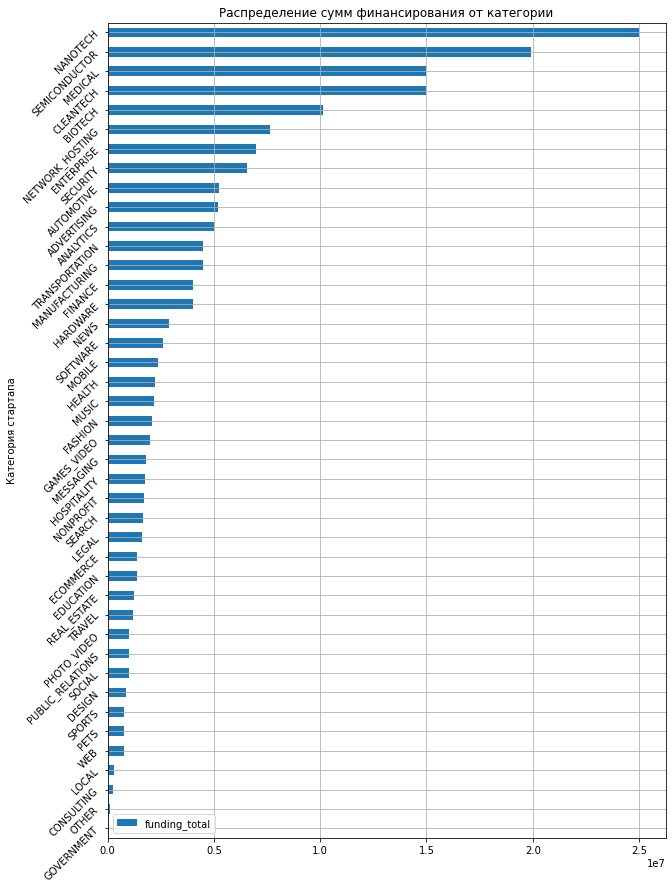

In [95]:
# Построим график столбчатой диаграммы
df_actual.groupby('category_code')['funding_total'].median().sort_values(ascending=True).plot(
    kind='barh',
               title=f'Распределение сумм финансирования от категории',
               legend=True,
               ylabel='Типичная сумма финансирования',
               xlabel='Категория стартапа',
               rot=45,
               figsize=(10, 15))
plt.grid()

# Выводим график
plt.show()

Самыми финансируемыми стартапами являются : nanotech, semiconductor, medical, cleantech и biotech. В эти стартапы охотно влкдывают деньги.

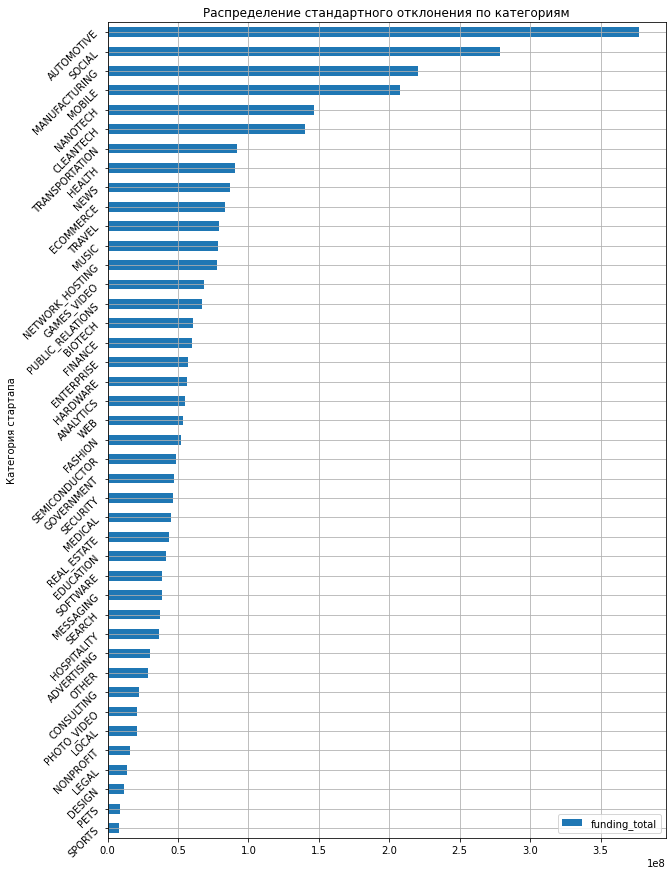

In [96]:
# Построим график столбчатой диаграммы
df_actual.groupby('category_code')['funding_total'].std().sort_values(ascending=True).plot(
    kind='barh',
               title=f'Распределение стандартного отклонения по категориям',
               legend=True,
               ylabel='Стандартное отклонение',
               xlabel='Категория стартапа',
               rot=45,
               figsize=(10, 15))
plt.grid()

# Выводим график
plt.show()

Наибольшее стандартное отклонения в группе automotive, social, manufacturing, mobile  - это говорит о том, что суммы финансирования в этих категориях варируются от самых высоких, до самых низких. А самой стабильной категорией является sports.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [97]:
# Посмотрим на уникальные значения  столбца
df_actual['funding_rounds'].nunique()


16

Всего 13 уникальных значений раундов

In [98]:
unique_raunds = df_actual['funding_rounds'].unique()
display(unique_raunds)

array([ 3.,  4., 11.,  1.,  0.,  8.,  5.,  6.,  2.,  7.,  9., 10., 12.,
       13., 14., 15.])

Раунды начинаются с 0, а заканчиваются 12. Итого всего 13 раундов.

In [99]:
# отфильтруем стартапы, у которых 0 раундов 
rounds_df = company_df[company_df['funding_rounds'] > 0]

Разделим данные на группы по статусу стартапа и для каждой группы посчитать типичное значение количества раундов. Например, можно использовать метод groupby:

In [100]:
# сгруппируем данные по статусу и найдем медианное кол-во раундов финансирования
status_round_count = rounds_df.groupby('status')['funding_rounds'].median()


In [101]:
# выведем типичное кол-во раундов финансирования для каждого сстатуса компании
status_round_count

status
acquired     2.0
closed       1.0
ipo          4.0
operating    2.0
Name: funding_rounds, dtype: float64

Всего в данных 4 статуса финансирования и типичными по кол-ву раундов для них являются: 
- acquired(приобретаемый) - 2
- closed(закрытый) - 1
- ipo(первичное публичное предложение) - 4
- operating (действующий) - 2

Исследуем распределение среднего кол-ва раундов в зависимости от статуса:

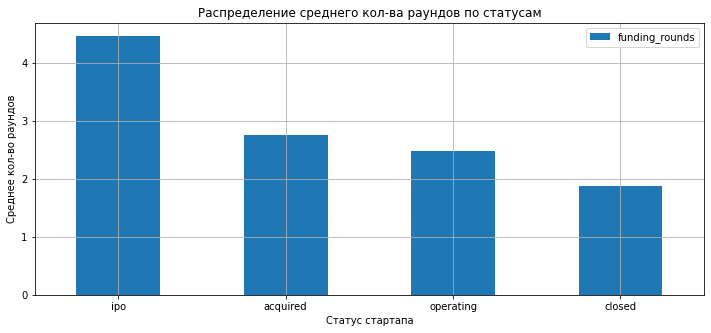

In [102]:
# Построим график столбчатой диаграммы
rounds_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение среднего кол-ва раундов по статусам',
               legend=True,
               ylabel='Среднее кол-во раундов',
               xlabel='Статус стартапа',
               rot=0,
               figsize=(12, 5))
plt.grid()

# Выводим график
plt.show()

Итого больше всего раундов финансирования приходится на ipo, а на действующие стартапы приходится меньше всего раундов. Это очень логично, ведь впервые выложенные на фондовый рынок компании, больше всего привлекают средства.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

Шаг 1. Знакомство с данными: загрузка и первичная предобработка
1.1. Вывод общей информации, исправление названия столбцов

Датасеты были созданны в новых переменных, о каждом датасете была выведена полная информация и первые строки, что помогла визуально оценить и подметить выводы для дальнейшей работы с данными. Также была проведена нормализация всех данных, т.е. столбцы были приведены к нижнему или верхнему регистру. После проверены на полные дубликаты. В итоге полных дубликатов ни в одном датасете обнаружено не было.

1.2. Смена типов и анализ пропусков

В ходе анализа пропусков в датасетах, было выявлено, что не все данные качественные, некоторые столбцы хранят много пропущенных значений. Так в датасете о компаниях и раундах финансирования, в информации о финансировании хранится значительно кол-во пропущенных значений. А датасеты об образовании и сотрудниках хранят достаточно много информации, но, к сожалению, имеют большое кол-во пропусков в данных о компаниях и соединить такие датасеты вместе будет проблематично.

Шаг 2. Предобработка данных, предварительное исследование

2.1. Раунды финансирования по годам

На основании визуализации можно сделать вывод, что в 2005 году типичный размер финансирования для 1-го раунда был наибольше всего, но начиная с этого года тенденция к повышению размера финансирования падала, в то время как тенденция на кол-во раундов винансирования росла. Что каксается 2013 года, отмечается небольшой рост типичного размера финансирования. Динамика раундов финансирования в этом году достигла пика.

2.2. Люди и их образование

Пропуски об образовани распределены в кажно категории почти равномерно, больше всего выделяется категория микропредприятия, где работает малое кол-во человек, возможно там изначально нет информации об образовании сотрудников. Пропуски идут на снижение, чем крупнее предприятие, тем меньше пропусков в данных.

Крупные стартапы       47.033898
Малые стартапы         43.567568
Масштабные стартапы    36.641221
Микростартап           67.667845
Средние стартапы       47.657791

2.3. Объединять или не объединять — вот в чём вопрос

Всего было посчитано 119849 уникальных значений после нормализации из 3 датасетов. Всего 0.01% оказалось значениями, которые есть в трех датасетах в этих столбцах. Можно сделать вывод, что объединить датасеты по столбцу network_username невозможно, т.к. очень мало данных пересекаются. Полученый датасет будет плохого качества.

2.4. Проблемный датасет и причина возникновения пропусков

В ходе подготовки датасета, были оставлены данные только о финансировании и компания, датасет отсортирован по id компании и отражает этапы финансирования. Названия столбцов приведены к snake_case. Удалены полные дубликаты. Остальные данные оставлены, чтобы сохранить максимально полный датасет, но были удалены пропуски по всем данным, по company_id, т.к. эти данные не смогли бы использовать.

Шаг 3. Исследовательский анализ объединённых таблиц

3.1. Объединение данных

Датасет приведен к формату который нужен заказчику, можно продолжить анализ. В качестве основы для объединённой таблицы взяты данные из обработанного датасета company_and_rounds.csv — выбераны только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, и те, у которых в колонке status указано acquired.

3.2. Анализ выбросов 

Средняя сумма финансирования равна ~ 2,1 мл., а медианное значение равно ~ 2,5, что незначительно отличается от среднего. Это говорит о том, что в данных распределение близко к нормальному. Но стандарное отклонение в 9 мл. говорит о том, что данные имеют большой разброс минимальных и максимальных значений от среднего.
Видно, что гистограмма имеет смещение в левую сторону и хвост в правой, что говорит об аномально низких значениях для эти данных. 
Нормальными для этих данных судя по диаграмме размаха, будут положительные значения около нуля, остальная часть данных судя по диаграмме - это выбросы.

3.3. Куплены забесплатно?

Из данных можно сделать вывод, что за 0 в основном покупали закрытые компании, с маленьким объемом финасирования. В основном, это web компани. Стоит отметить, что в подобных случаях цена продажи за ноль или символическую сумму часто объясняется тем, что покупатель берет на себя обязательства по погашению долгов компании или иным обязательствам, что значительно уменьшает стоимость самой компании. Так же возможо, что такие покупки обусловлены сбоем в данных, т.к. покупались они за наличные и могу отсуствовать данные.

Также были рассчитаны нижний и верхний порог выбросов:
Верхний порог выбросов: 39782000.0
Нижний порог выбросов: 0

По данным нижний порог выбросов получается отрицательный, но это неверно из диаграм выше можно сделать вывод, что нижний порог выбросов равен нулю, поэтому предлагаю считать его как 0.

Процент отфильтрованных данных по верхней границе 12.81%

На основании предпосылок, что данные имеют асимметричное распределение, наличие выбросов и несбалансированность их количества на нижней и верхней границе, планируемая замена нижней и верхней границ выбросов на значения, рассчитанные по процентилям, кажется целесообразной. Это позволит более точно определить границы выбросов, учитывая особенности распределения данных.

3.4. Цены стартапов по категориям

Самыми финансируемыми стартапами являются : nanotech, semiconductor, medical, cleantech и biotech. В эти стартапы охотно влкдывают деньги.

Наибольшее стандартное отклонения в группе automotive, social, manufacturing, mobile - это говорит о том, что суммы финансирования в этих категориях варируются от самых высоких, до самых низких. А самой стабильной категорией является sports.

3.5. Сколько раундов продержится стартап перед покупкой

Всего в данных 4 статуса финансирования и типичными по кол-ву раундов для них являются:

acquired(приобретаемый) - 2
closed(закрытый) - 1
ipo(первичное публичное предложение) - 4
operating (действующий) - 2

Итого больше всего раундов финансирования приходится на ipo, а на действующие стартапы приходится меньше всего раундов. Это очень логично, ведь впервые выложенные на фондовый рынок компании, больше всего привлекают средства.

На основании представленных выводов, вот несколько рекомендаций для дальнейшей работы с данными и анализа:

Для улучшения анализа данных и повышения его точности можно фильтровать данные по рассчитанным верхним и нижним границам выбросов. Также стоит исследовать альтернативные ключи для объединения датасетов и использовать внешние источники данных для дополнения информации о компаниях. Это обеспечит более полное представление о данных. Кроме того, следует изучить факторы успеха стартапов в популярных категориях, что поможет выявить потенциальные инвестиционные возможности. 

Не менее важным является использование разнообразных графических методов визуализации данных и создание интерактивных дашбордов для представления результатов анализа. Это сделает выводы более наглядными и понятными.
